In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [96]:
df=pd.read_csv("data/TrainAndValid.csv",
               low_memory=False)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [98]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

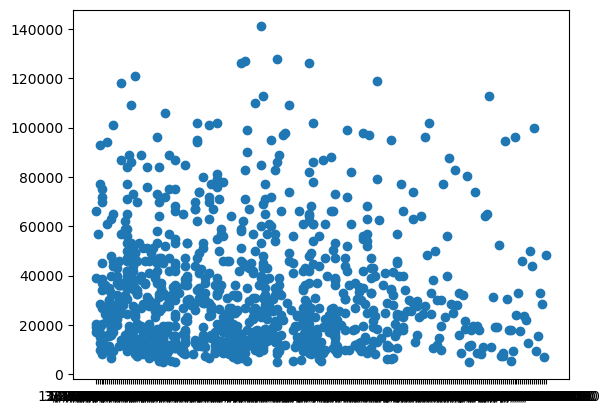

In [99]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [100]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

<AxesSubplot: ylabel='Frequency'>

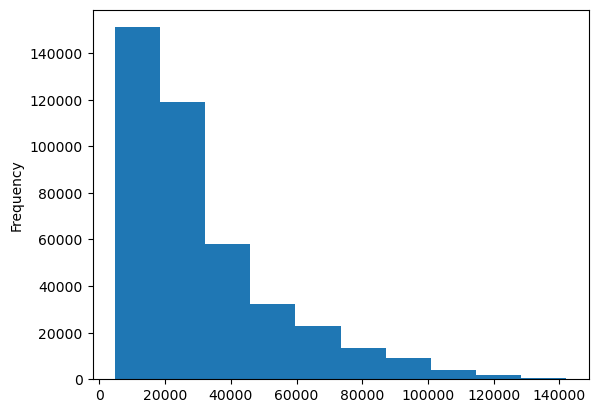

In [101]:
df.SalePrice.plot.hist()

In [102]:
df=pd.read_csv("data/TrainAndValid.csv",
              low_memory=False,
              parse_dates=["saledate"])

df.saledate.dtype

dtype('<M8[ns]')

In [103]:
df["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

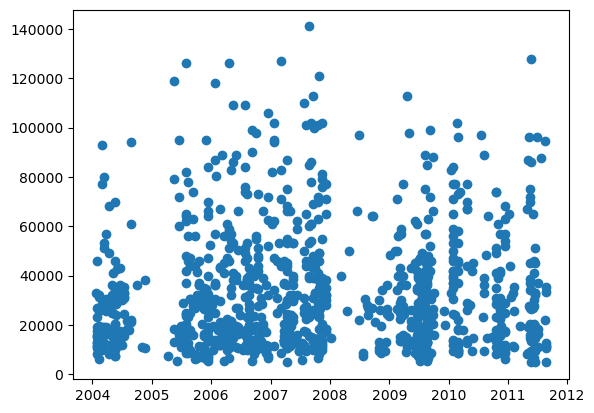

In [104]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [105]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df.head().T        

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [107]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [108]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [109]:
df_tmp=df.copy()


In [110]:
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"]=df_tmp.saledate.dt.dayofyear

In [111]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [112]:
df_tmp.drop("saledate",axis=1,inplace=True)

In [113]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [114]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)

model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [115]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [116]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):#check how this works
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [117]:
#turning string values into category values

for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [118]:
df_tmp.info

<bound method DataFrame.info of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   
...         ...        ...        ...      ...         ...           ...   
410879  6302984    16000.0    1915521     5266         149          99.0   
412476  6324811     6000.0    1919104    19330         149          99.0   
411927  6313029    16000.0    1918416    17244         149          99.0   
407124  6266251    55000.0     509560     3357         149          99.0   
409203  6283635    34000.0    1869284     4701         149          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand fi

In [119]:
df_tmp.state.cat.categories 

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [120]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [121]:
df_tmp.to_csv("data/train_tmp.csv",
              index=False)


In [122]:
df_tmp=pd.read_csv("data/train_tmp.csv",
              low_memory=False)

df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [123]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleDay
saleMonth
saleDayOfWeek
saleDayOfYear


In [124]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [125]:
#Fill the empty rows with median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary coloumn that says if a data was missing or not
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            #fill missing numeric values with median
            df_tmp[label]=content.fillna(content.median())
            

In [126]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


In [127]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [128]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [129]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [130]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes +1

In [131]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [132]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [133]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [138]:
%%time

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)

model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

CPU times: total: 25min 10s
Wall time: 1min 48s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [139]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875440066186206

In [140]:
df_val=df_tmp[df_tmp.saleYear == 2012]
df_train=df_tmp[df_tmp.saleYear != 2012]
len(df_val),len(df_train)

(11573, 401125)

In [141]:
x_train,y_train=df_train.drop("SalePrice",axis =1),df_train.SalePrice
x_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [142]:
#Building an evaluation function:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_valid)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
           "Validation MAE":mean_absolute_error(y_valid,val_preds),
           "Training RMSLE":rmsle(y_train,train_preds),
           "validation RMSLE":rmsle(y_valid,val_preds),
           "Training R2":r2_score(y_train,train_preds),
           "Validation R2":r2_score(y_valid,val_preds)}
    return scores

In [143]:
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42,
                           max_samples=10000)


In [144]:
%%time
model.fit(x_train,y_train)

CPU times: total: 43.3 s
Wall time: 3.34 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [145]:
show_scores(model)

{'Training MAE': 5562.079819856652,
 'Validation MAE': 7178.695028082606,
 'Training RMSLE': 0.2577376357095064,
 'validation RMSLE': 0.2933375745468615,
 'Training R2': 0.8605891310325422,
 'Validation R2': 0.8315394436192207}

In [146]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=42),
                                                 param_distributions=rf_grid,
                                                 n_iter=2,
                                                 cv=5,
                                                 verbose=True)

rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 7.64 s
Wall time: 19.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [147]:
show_scores(rs_model)

{'Training MAE': 11882.48622034796,
 'Validation MAE': 13619.647072773387,
 'Training RMSLE': 0.5095471176730044,
 'validation RMSLE': 0.5160007075337022,
 'Training R2': 0.4800105694032245,
 'Validation R2': 0.47905079687283714}

In [153]:
%%time
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)

ideal_model.fit(x_train,y_train)

CPU times: total: 4min 52s
Wall time: 23.2 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [154]:
show_scores(ideal_model)

{'Training MAE': 2955.9839332998963,
 'Validation MAE': 5964.1771536734595,
 'Training RMSLE': 0.14458146009839043,
 'validation RMSLE': 0.2472885722338778,
 'Training R2': 0.9587327618460258,
 'Validation R2': 0.8811250314619335}

In [155]:
show_scores(rs_model)

{'Training MAE': 11882.486220347962,
 'Validation MAE': 13619.647072773387,
 'Training RMSLE': 0.5095471176730045,
 'validation RMSLE': 0.5160007075337022,
 'Training R2': 0.4800105694032245,
 'Validation R2': 0.47905079687283714}

In [164]:
df_test=pd.read_csv("data/Test.csv",
                   low_memory=False,
                   parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [165]:
test_preds=ideal_model.predict(df_test)

C:\Users\xxhar\OneDrive\Desktop\sampleproj1\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Low'

In [166]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [167]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [168]:
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [163]:
df_test.saledate.dtype

dtype('O')

In [169]:
#making predictions on new test 
test_preds=ideal_model.predict(df_test)

C:\Users\xxhar\OneDrive\Desktop\sampleproj1\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [170]:
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [171]:
df_test["auctioneerID_is_missing"]=False

In [172]:
 df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [173]:
test_preds=ideal_model.predict(df_test)

C:\Users\xxhar\OneDrive\Desktop\sampleproj1\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [174]:
len(test_preds)

array([21608.1614493 , 20976.44010123, 53800.90336313, ...,
       13140.30098898, 19697.43075745, 30192.54679538])

In [175]:
#Format predictions
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,21608.161449
1,1227844,20976.440101
2,1227847,53800.903363
3,1227848,64350.874365
4,1227863,44139.438112
...,...,...
12452,6643171,45796.256809
12453,6643173,16616.801234
12454,6643184,13140.300989
12455,6643186,19697.430757


In [176]:
df_preds.to_csv("data/test_predictions.csv",
                index=False)

In [178]:
ideal_model.feature_importances_

array([3.46371834e-02, 1.80631866e-02, 4.27360326e-02, 2.03905687e-03,
       3.39063451e-03, 2.12254263e-01, 3.07558167e-03, 1.05487170e-03,
       4.42811073e-02, 4.35401448e-02, 6.25353419e-02, 4.41536443e-03,
       1.18869574e-02, 1.50988687e-01, 4.48795135e-02, 5.96648736e-03,
       1.77364385e-03, 3.72694798e-03, 3.46998320e-03, 5.67605489e-02,
       5.08396831e-04, 9.98095061e-05, 9.85707343e-04, 1.50875370e-04,
       1.44981268e-03, 2.27782518e-05, 3.96921988e-03, 4.20795278e-03,
       3.48080236e-04, 2.27476328e-03, 3.44743709e-03, 2.17294008e-03,
       3.29471304e-03, 3.98967510e-04, 2.22358674e-03, 3.98956065e-03,
       7.52498277e-04, 1.31281701e-02, 1.51398146e-03, 7.80634713e-06,
       1.16577661e-03, 8.90987127e-04, 4.58377231e-03, 5.56066934e-04,
       4.68787219e-04, 3.67129501e-04, 3.25440612e-04, 2.33250847e-03,
       1.07076434e-03, 3.90806119e-04, 6.06706316e-04, 7.24043399e-02,
       5.64686395e-03, 3.76470362e-03, 2.94399778e-03, 9.83332120e-03,
      

In [187]:
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                      "feature_importances":importances
                      }).sort_values("feature_importances",ascending=False)
                      .reset_index(drop=True))
    
    #plot the dataFrame
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("feature_importances")

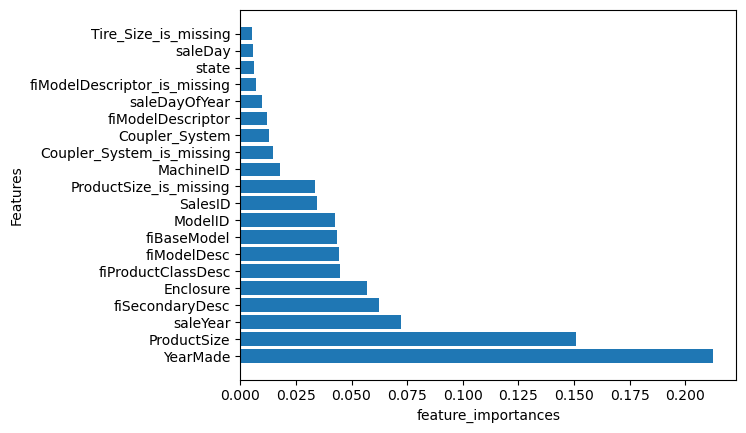

In [188]:
plot_features(x_train.columns,ideal_model.feature_importances_)